In [467]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [468]:
#device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"

In [469]:

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# train/test split
train_split = int(0.8 * len(X)) # 80% of data for training, 20% for testing 
X_train, y_train = X[:train_split].to(device), y[:train_split].to(device)
X_test, y_test = X[train_split:].to(device), y[train_split:].to(device)

len(X_train), len(y_train), len(X_test), len(y_test)
print(X_train[-10:])
print(y_train[-10:])
print(X_test[:10])
print(y_test[:10])
X_train.device

tensor([[0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])
tensor([[0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460]])
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


device(type='cpu')

In [470]:
# plot predictions
def plot_predictions(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,Predictions=None):
    plt.figure()
    plt.scatter(X_train,y_train,label="trainig data", s=4)
    plt.scatter(X_test ,y_test ,label="testing data", s=4)
    if Predictions is not None:
        plt.scatter(X_test,Predictions ,label="predictions", s=4)
    plt.xlabel("feature")
    plt.ylabel("target and predictions")
    plt.title("Prediction plot")
    plt.legend()

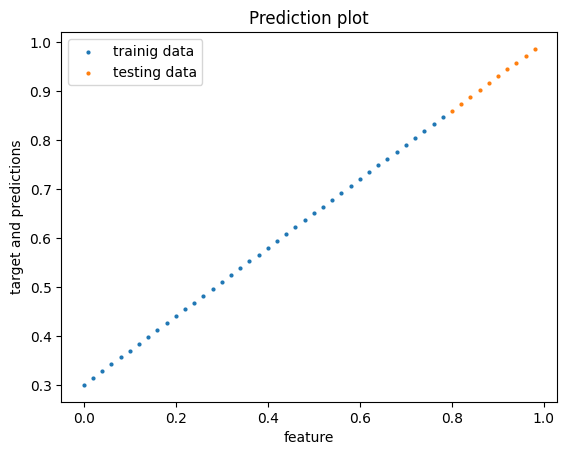

In [471]:
plot_predictions()

In [472]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        
    def forward(self, x:torch.tensor)->torch.tensor:
        return self.weights*x +self.bias

In [473]:
torch.manual_seed(42)
model=LinearRegression()

In [474]:
model.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [475]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.03)

In [476]:
y_pred.dtype, y_train.dtype

(torch.float32, torch.float32)

In [477]:
#loss curve
epoch_count=[]
loss_values=[]
test_loss_values=[]

def loss_curve(epoch_count=epoch_count,loss_values=loss_values,test_loss_values=test_loss_values):
    plt.figure(2)
    plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()), label="train loss")
    plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).cpu().numpy()), label="test loss")
    plt.title("training and test loss curve")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss")

epoch:0|loss:0.10493002086877823|test_loss:0.21963903307914734
epoch:10|loss:0.027214879170060158|test_loss:0.08227909356355667
epoch:20|loss:0.008710908703505993|test_loss:0.038764648139476776
epoch:30|loss:0.0042135692201554775|test_loss:0.022989172488451004
epoch:40|loss:0.003034472232684493|test_loss:0.01641182415187359
epoch:50|loss:0.0026461505331099033|test_loss:0.013271359726786613
epoch:60|loss:0.0024506833869963884|test_loss:0.011553304269909859
epoch:70|loss:0.00230638450011611|test_loss:0.010472123511135578
epoch:80|loss:0.0021794550120830536|test_loss:0.009695129469037056
epoch:90|loss:0.002061620121821761|test_loss:0.009073616936802864
epoch:100|loss:0.0019506547832861543|test_loss:0.008538642898201942
epoch:110|loss:0.0018457811092957854|test_loss:0.008057432249188423
epoch:120|loss:0.0017465747660025954|test_loss:0.00761384516954422
epoch:130|loss:0.0016527042025700212|test_loss:0.007199651561677456
epoch:140|loss:0.0015638808254152536|test_loss:0.006810349877923727
epo

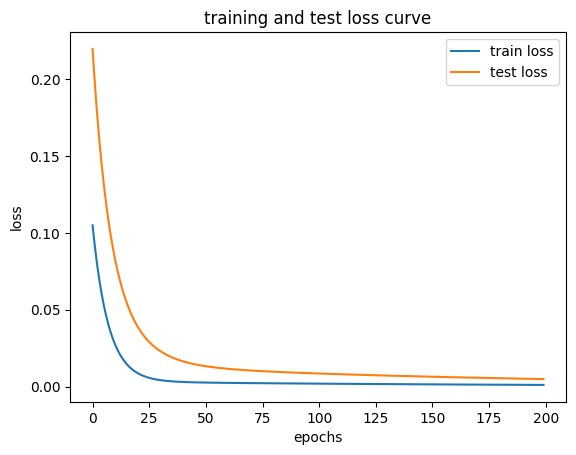

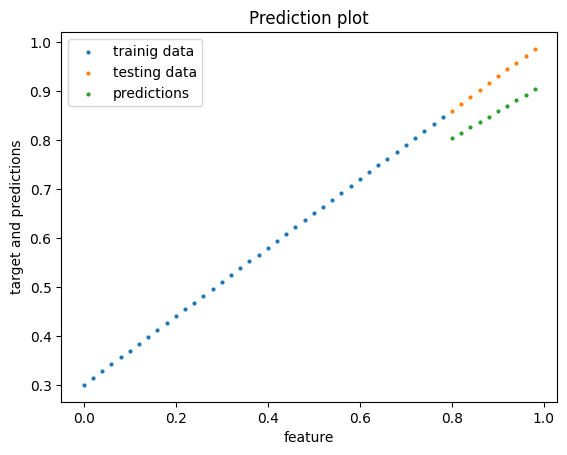

In [478]:
#training and testing loop

epochs=200
for epoch in range(epochs):
    model.train()
    y_pred=model(X_train)
    loss=loss_fn(y_pred,y_train)
#     print(f"y_pred:{y_pred[:2]},\ny_train:{y_train[:2]},\nloss:{loss}")
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred=model(X_test)
        test_loss=loss_fn(test_pred,y_test) 
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    if(epoch%10==0):
        print(f"epoch:{epoch}|loss:{loss}|test_loss:{test_loss}")
        
        
loss_curve()
plot_predictions(Predictions=test_pred.detach().numpy())

